<a href="https://colab.research.google.com/github/hbinmadi/getbhavcopy/blob/master/Rlwith_sma_obv_rsi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import dependencies

In [ ]:
!pip install stable-baselines3 gym-anytrading gym
!pip install yahoo_fin

In [ ]:
def ImportData(ticker,NoOfDays):
# pip install yahoo_fin
  from yahoo_fin import stock_info as si
  from datetime import datetime, timedelta
  d = datetime.today() - timedelta(days=NoOfDays)
  # load it from yahoo_fin library
  df = si.get_data(ticker,d,datetime.today())
  df = df[df.volume.notnull()]
  df = df[df.volume != 0]
  print(df.head)
  return df

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [ ]:
df = ImportData("ICICIBANK.NS",4000)

# gapminder.columns = ['country','year','population',
#                     'continent','life_exp','gdp_per_cap']
df.columns=['Open','High','Low','Close','adjclose','Volume','ticker']
if "date" not in df.columns:
    df["date"] = df.index
df.head()

<bound method NDFrame.head of                   open        high  ...      volume        ticker
2010-07-05  152.363632  153.763641  ...   8028047.0  ICICIBANK.NS
2010-07-06  152.636368  156.672729  ...  12755105.0  ICICIBANK.NS
2010-07-07  155.818176  156.018188  ...  11463655.0  ICICIBANK.NS
2010-07-08  156.000000  157.418182  ...   9200433.0  ICICIBANK.NS
2010-07-09  157.545456  159.818176  ...  17697773.0  ICICIBANK.NS
...                ...         ...  ...         ...           ...
2021-06-10  635.450012  642.400024  ...  10712418.0  ICICIBANK.NS
2021-06-11  644.000000  644.549988  ...   9015059.0  ICICIBANK.NS
2021-06-14  635.700012  636.099976  ...  10170497.0  ICICIBANK.NS
2021-06-15  636.349976  646.200012  ...  11039987.0  ICICIBANK.NS
2021-06-16  644.900024  649.200012  ...   8599758.0  ICICIBANK.NS

[2697 rows x 7 columns]>


,Open,High,Low,Close,adjclose,Volume,ticker,date
2010-07-05,152.363632,153.763641,151.636368,152.836365,131.895248,8028047.0,ICICIBANK.NS,2010-07-05
2010-07-06,152.636368,156.672729,152.445450,156.145447,134.750931,12755105.0,ICICIBANK.NS,2010-07-06
2010-07-07,155.818176,156.018188,153.500000,153.854538,132.773895,11463655.0,ICICIBANK.NS,2010-07-07
2010-07-08,156.000000,157.418182,155.463638,156.781815,135.300125,9200433.0,ICICIBANK.NS,2010-07-08
2010-07-09,157.545456,159.818176,157.454544,159.254547,137.434021,17697773.0,ICICIBANK.NS,2010-07-09


In [ ]:
if "date" not in df.columns:
    df["date"] = df.index
df.head()

,Open,High,Low,Close,adjclose,Volume,ticker,date
2010-07-05,152.363632,153.763641,151.636368,152.836365,131.895248,8028047.0,ICICIBANK.NS,2010-07-05
2010-07-06,152.636368,156.672729,152.445450,156.145447,134.750931,12755105.0,ICICIBANK.NS,2010-07-06
2010-07-07,155.818176,156.018188,153.500000,153.854538,132.773895,11463655.0,ICICIBANK.NS,2010-07-07
2010-07-08,156.000000,157.418182,155.463638,156.781815,135.300125,9200433.0,ICICIBANK.NS,2010-07-08
2010-07-09,157.545456,159.818176,157.454544,159.254547,137.434021,17697773.0,ICICIBANK.NS,2010-07-09


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Open               float64
High               float64
Low                float64
Close              float64
adjclose           float64
Volume             float64
ticker              object
date        datetime64[ns]
dtype: object

In [ ]:
df.sort_values('date', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,adjclose,Volume,ticker,date
2010-07-05,152.363632,153.763641,151.636368,152.836365,131.895248,8028047.0,ICICIBANK.NS,2010-07-05
2010-07-06,152.636368,156.672729,152.445450,156.145447,134.750931,12755105.0,ICICIBANK.NS,2010-07-06
2010-07-07,155.818176,156.018188,153.500000,153.854538,132.773895,11463655.0,ICICIBANK.NS,2010-07-07
2010-07-08,156.000000,157.418182,155.463638,156.781815,135.300125,9200433.0,ICICIBANK.NS,2010-07-08
2010-07-09,157.545456,159.818176,157.454544,159.254547,137.434021,17697773.0,ICICIBANK.NS,2010-07-09


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [ ]:
env.signal_features
print(len(env.signal_features))

250


# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': -9.954513549804688, 'total_profit': 0.3844132964144425, 'position': 1}


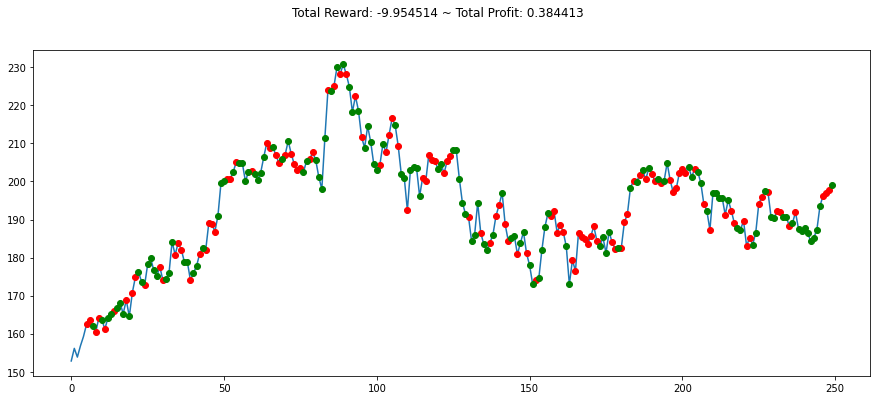

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [ ]:
#df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [ ]:
df.dtypes

Open               float64
High               float64
Low                float64
Close              float64
adjclose           float64
Volume             float64
ticker              object
date        datetime64[ns]
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [ ]:
df['SMA'] = TA.SMA(df, 9)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df['ROC']=  TA.ROC(df)
df.fillna(0, inplace=True)

In [ ]:
df.head(15)

,Open,High,Low,Close,adjclose,Volume,ticker,date,SMA,RSI,OBV,ROC
2010-07-05,152.363632,153.763641,151.636368,152.836365,131.895248,8028047.0,ICICIBANK.NS,2010-07-05,0.000000,0.000000,0.0,0.000000
2010-07-06,152.636368,156.672729,152.445450,156.145447,134.750931,12755105.0,ICICIBANK.NS,2010-07-06,0.000000,100.000000,12755105.0,0.000000
2010-07-07,155.818176,156.018188,153.500000,153.854538,132.773895,11463655.0,ICICIBANK.NS,2010-07-07,0.000000,57.288073,1291450.0,0.000000
2010-07-08,156.000000,157.418182,155.463638,156.781815,135.300125,9200433.0,ICICIBANK.NS,2010-07-08,0.000000,73.099021,10491883.0,0.000000
2010-07-09,157.545456,159.818176,157.454544,159.254547,137.434021,17697773.0,ICICIBANK.NS,2010-07-09,0.000000,79.875824,28189656.0,0.000000
2010-07-12,160.890915,162.727264,159.281815,162.445450,140.187729,22222106.0,ICICIBANK.NS,2010-07-12,0.000000,85.094181,50411762.0,0.000000
2010-07-13,156.409088,163.818176,156.409088,163.536362,141.129150,13894930.0,ICICIBANK.NS,2010-07-13,0.000000,86.393246,64306692.0,0.000000
2010-07-14,164.181824,166.263641,161.118179,162.045456,139.842545,14287663.0,ICICIBANK.NS,2010-07-14,0.000000,76.571524,50019029.0,0.000000
2010-07-15,161.645447,163.790909,159.690903,160.336365,138.367630,15469250.0,ICICIBANK.NS,2010-07-15,158.581816,67.147481,34549779.0,0.000000
2010-07-16,161.090912,164.545456,161.090912,164.072723,141.592026,16519811.0,ICICIBANK.NS,2010-07-16,159.830300,74.528186,51069590.0,0.000000


## 2.1.4. Create New Environments

In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    #signal_features = env.df.loc[:, ['Close', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'ROC']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
df.describe()

,Open,High,Low,Close,adjclose,Volume,SMA,RSI,OBV,ROC
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2.697000e+03,2697.000000,2697.000000,2.697000e+03,2697.000000
mean,281.840096,285.590555,277.790930,281.687509,269.937781,2.095423e+07,280.506509,52.252073,4.204540e+08,0.880628
std,112.558065,113.940536,111.105063,112.653891,119.392474,1.401489e+07,112.468248,11.668027,6.690166e+08,7.160803
min,120.363632,122.000000,116.545456,118.800003,103.862953,1.114874e+06,0.000000,0.000000,-7.247068e+08,-44.132980
25%,196.000000,198.681824,193.763641,196.254547,174.424301,1.276513e+07,194.997981,43.878674,6.809804e+07,-3.585203
50%,257.636353,260.200012,254.545456,257.409088,245.371460,1.756429e+07,256.292928,52.176866,2.813793e+08,0.490943
75%,327.450012,334.000000,322.450012,328.350006,322.700012,2.500477e+07,325.877780,61.040298,4.726909e+08,4.953047
max,673.400024,679.400024,652.000000,673.950012,673.950012,2.868577e+08,650.766656,100.000000,2.773598e+09,27.581640


In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,200))



In [ ]:
env2.signal_features

array([[ 1.52836365e+02,  0.00000000e+00],
       [ 1.56145447e+02,  0.00000000e+00],
       [ 1.53854538e+02,  0.00000000e+00],
       [ 1.56781815e+02,  0.00000000e+00],
       [ 1.59254547e+02,  0.00000000e+00],
       [ 1.62445450e+02,  0.00000000e+00],
       [ 1.63536362e+02,  0.00000000e+00],
       [ 1.62045456e+02,  0.00000000e+00],
       [ 1.60336365e+02,  0.00000000e+00],
       [ 1.64072723e+02,  0.00000000e+00],
       [ 1.63645447e+02,  0.00000000e+00],
       [ 1.61245453e+02,  0.00000000e+00],
       [ 1.64109085e+02,  7.37567944e+00],
       [ 1.65218185e+02,  5.81044074e+00],
       [ 1.65972733e+02,  7.87639724e+00],
       [ 1.66672729e+02,  6.30871313e+00],
       [ 1.68036362e+02,  5.51432580e+00],
       [ 1.65245453e+02,  1.72365742e+00],
       [ 1.68854538e+02,  3.25198397e+00],
       [ 1.64527267e+02,  1.53155268e+00],
       [ 1.70827271e+02,  6.54306076e+00],
       [ 1.74909088e+02,  6.60461076e+00],
       [ 1.76227264e+02,  7.68846178e+00],
       [ 1.

In [ ]:
df.head()

,Open,High,Low,Close,adjclose,Volume,ticker,date,SMA,RSI,OBV,ROC
2010-07-05,152.363632,153.763641,151.636368,152.836365,131.895248,8028047.0,ICICIBANK.NS,2010-07-05,0.0,0.000000,0.0,0.0
2010-07-06,152.636368,156.672729,152.445450,156.145447,134.750931,12755105.0,ICICIBANK.NS,2010-07-06,0.0,100.000000,12755105.0,0.0
2010-07-07,155.818176,156.018188,153.500000,153.854538,132.773895,11463655.0,ICICIBANK.NS,2010-07-07,0.0,57.288073,1291450.0,0.0
2010-07-08,156.000000,157.418182,155.463638,156.781815,135.300125,9200433.0,ICICIBANK.NS,2010-07-08,0.0,73.099021,10491883.0,0.0
2010-07-09,157.545456,159.818176,157.454544,159.254547,137.434021,17697773.0,ICICIBANK.NS,2010-07-09,0.0,79.875824,28189656.0,0.0


# 3. Build Environment and Train

In [ ]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 332      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.666   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -3.66    |
|    value_loss         | 23.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 342      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.595   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.00156  |
|    value_loss     

# 4. Evaluation

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(12,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -18.690872192382812, 'total_profit': 0.3500849001433131, 'position': 1}


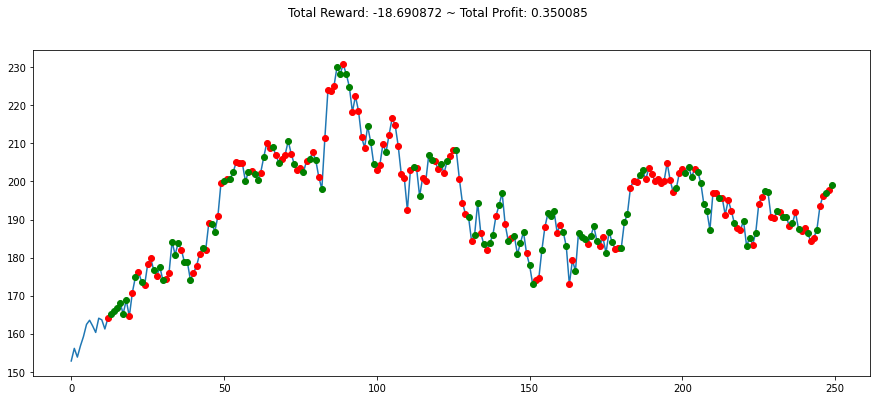

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
action[0]
#print("> max_possible_profit:", MyCustomEnv.max_possible_profit)

1

In [ ]:
#model.save('MyFirstRl.h5')
#!zip -r /content/models.zip /content
#from google.colab import files
#files.download("MyFirstRl.h5")